# Determining The Regional Difference in Brazil Real Estate Market

In [1]:
## import libraries
import pandas as pd

In [2]:
df = pd.read_excel(r'C:\Users\project_data\Brasil-real-estate-1.xlsx', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12834 entries, 1 to 12834
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            12834 non-null  object 
 1   place_with_parent_names  12834 non-null  object 
 2   region                   12834 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  12834 non-null  int64  
 5   price_usd                12834 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 701.9+ KB


In [3]:
##split the lat-lon column into 2,then drop the lat-lon col
df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
df.drop(columns= ["lat-lon"], inplace=True)
df

,property_type,place_with_parent_names,region,area_m2,price_usd,lat,lon
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,110,187230.85,-9.644305,-35.708814
2,apartment,|Brasil|Alagoas|Maceió|,Northeast,65,81133.37,-9.643093,-35.704840
3,house,|Brasil|Alagoas|Maceió|,Northeast,211,154465.45,-9.622703,-35.729795
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,99,146013.20,-9.622837,-35.719556
5,apartment,|Brasil|Alagoas|Maceió|,Northeast,55,101416.71,-9.654955,-35.700227
...,...,...,...,...,...,...,...
12830,apartment,|Brasil|Pernambuco|Recife|,Northeast,91,174748.79,-8.056418,-34.909309
12831,apartment,|Brasil|Pernambuco|Recife|,Northeast,115,115459.02,-8.137348,-34.909181
12832,apartment,|Brasil|Pernambuco|Recife|Boa Viagem|,Northeast,76,137302.62,-8.113672,-34.896252
12833,apartment,|Brasil|Pernambuco|Recife|Boa Viagem|,Northeast,130,234038.56,NaN,NaN


In [4]:
## Create a  state column from the place with parent names column, then drop place_with_parent_names column
df["state"] = df["place_with_parent_names"].str.split("|", expand=True) [2]
df.drop(columns= ["place_with_parent_names"], inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11551 entries, 1 to 12834
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  11551 non-null  object 
 1   region         11551 non-null  object 
 2   area_m2        11551 non-null  int64  
 3   price_usd      11551 non-null  float64
 4   lat            11551 non-null  float64
 5   lon            11551 non-null  float64
 6   state          11551 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 721.9+ KB


In [27]:

df1 = pd.read_excel(r"C:\Users\project_data\Brasil-real-estate-2.xlsx", index_col=0)
df1.info()
#df1["property_type"]

c
1        apartment
2        apartment
3        apartment
4        apartment
5        apartment
           ...    
12828        house
12829        house
12830    apartment
12831    apartment
12833    apartment
Name: property_type, Length: 11293, dtype: object

In [6]:
## Convert the price_brl to price_usd, as at 2015-2016 when the data was collected, a USD cost 3.19 Brazilian
df1["price_usd"] = df1["price_brl"] / 3.19
df1["price_usd"]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12833 entries, 1 to 12833
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  12833 non-null  object 
 1   state          12833 non-null  object 
 2   region         12833 non-null  object 
 3   lat            12833 non-null  float64
 4   lon            12833 non-null  float64
 5   area_m2        11293 non-null  float64
 6   price_brl      12833 non-null  float64
 7   price_usd      12833 non-null  float64
dtypes: float64(5), object(3)
memory usage: 902.3+ KB


In [7]:
## drop price_brl column and any nan column
df1.drop(columns= ["price_brl"], inplace=True)
df1.dropna(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11293 entries, 1 to 12833
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  11293 non-null  object 
 1   state          11293 non-null  object 
 2   region         11293 non-null  object 
 3   lat            11293 non-null  float64
 4   lon            11293 non-null  float64
 5   area_m2        11293 non-null  float64
 6   price_usd      11293 non-null  float64
dtypes: float64(4), object(3)
memory usage: 705.8+ KB


In [9]:
## Concatenate df1 and df2 to create a new DataFrame named df.
df2 = pd.concat([df,df1])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22844 entries, 1 to 12833
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  22844 non-null  object 
 1   region         22844 non-null  object 
 2   area_m2        22844 non-null  float64
 3   price_usd      22844 non-null  float64
 4   lat            22844 non-null  float64
 5   lon            22844 non-null  float64
 6   state          22844 non-null  object 
dtypes: float64(4), object(3)
memory usage: 1.4+ MB


In [ ]:
!pip3 install plotly

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
fig = px.scatter_mapbox(df,
    lat="lat",
    lon="lon",
    center={"lat": -14.2, "lon": -51.9},  # Map will be centered on Brazil
    width=600,
    height=600,
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [18]:
summary_stats = df2[["area_m2", "price_usd"]].describe()
summary_stats

,area_m2,price_usd
count,22844.000000,22844.000000
mean,115.020224,194987.315480
std,47.742932,103617.682978
min,53.000000,74892.340000
25%,76.000000,113898.770000
50%,103.000000,165697.555000
75%,142.000000,246900.880878
max,252.000000,525659.717868


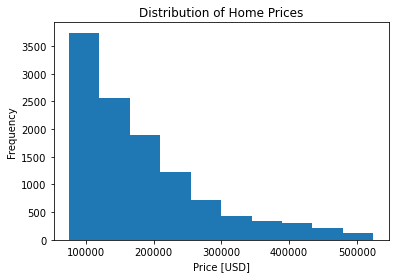

In [19]:
plt.hist(df["price_usd"])
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices");

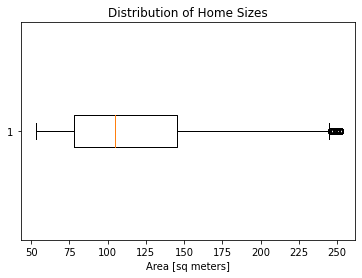

In [20]:
plt.boxplot(df["area_m2"], vert=False)
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Home Sizes");

In [21]:
mean_price_by_region = df.groupby("region")["price_usd"].mean().sort_values(ascending=True)
mean_price_by_region

region
South           164168.840031
Central-West    178596.283663
North           182761.422871
Northeast       185993.562957
Southeast       191811.451904
Name: price_usd, dtype: float64

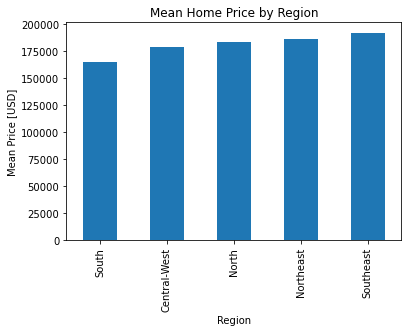

In [22]:
mean_price_by_region.plot(
    kind="bar",
    xlabel="Region",
    ylabel="Mean Price [USD]",
    title="Mean Home Price by Region"
);

In [34]:
## Focusing on the southern region of brazil looking at the relationship between home size and price.
df_south = df2[df2["region"] == "South"]
df_south.head()

,property_type,region,area_m2,price_usd,lat,lon,state
9305,apartment,South,127.0,296448.85,-25.455704,-49.292918,Paraná
9306,apartment,South,104.0,219996.25,-25.455704,-49.292918,Paraná
9307,apartment,South,100.0,194210.50,-25.460236,-49.293812,Paraná
9308,apartment,South,77.0,149252.94,-25.460236,-49.293812,Paraná
9309,apartment,South,73.0,144167.75,-25.460236,-49.293812,Paraná


In [25]:
df_south["property_type"].head()

9305    apartment
9306    apartment
9307    apartment
9308    apartment
9309    apartment
Name: property_type, dtype: object

In [36]:
#The number of apartment in each state
homes_by_state = df_south["state"].value_counts()
homes_by_state
#df_south.isin(["Santa Catarina"]).any()

Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: state, dtype: int64

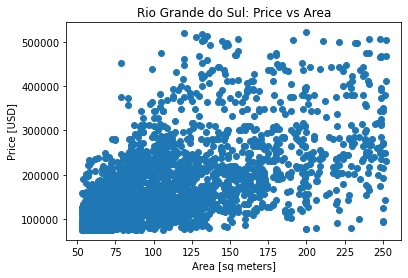

In [38]:
# Scatter plot showing price vs area for the state in Rio Grande do Sul
df_rio = df_south[df_south["state"] == "Rio Grande do Sul"]
plt.scatter(x=df_rio["area_m2"], y=df_rio["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Rio Grande do Sul: Price vs Area");


In [40]:
df_santa = df_south[df_south["state"] == "Santa Catarina"]
df_santa
p_corr_santa = df_santa["area_m2"].corr(df_santa["price_usd"])
print(p_corr_santa)


0.5068121776366777


In [41]:
df_rio = df_south[df_south["state"] == "Rio Grande do Sul"]
df_rio
p_corr_rio = df_rio["area_m2"].corr(df_rio["price_usd"])
print(p_corr_rio)


0.5773267433717684


In [42]:
df_parana = df_south[df_south["state"] == "Parana"]
df_parana
p_corr_parana = df_rio["area_m2"].corr(df_rio["price_usd"])
print(p_corr_parana)


0.5773267433717684
